# Lecture 5 - SciPy

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

## Interpolation : `scipy.interpolate`

In [2]:
x = np.linspace(-1,2,5)
x

array([-1.  , -0.25,  0.5 ,  1.25,  2.  ])

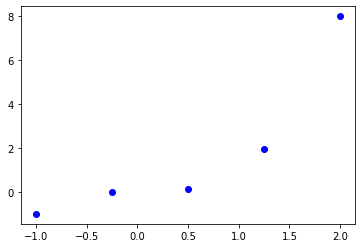

In [3]:
y = x**3
plt.plot(x,y,'bo')

In [6]:
f = interp.interp1d(x,y,kind="linear")

In [7]:
type(f)

scipy.interpolate.interpolate.interp1d

In [8]:
f(0.2)

array(0.06875)

In [10]:
f(1.8)

array(6.3875)

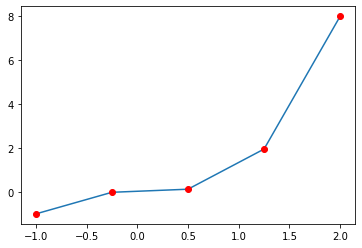

In [9]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

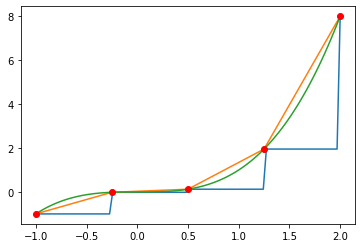

In [11]:
plt.plot(x_fine, interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine, interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine, interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [12]:
interp.interp1d?

In [13]:
interp.interp2d?